# CBMS Data Cleaning and Visualization
DATASCI S14<br>
**Lim, Ivana Koon Yee U.<br>
Rodriguez, Jean Noelle L.**

For this notebook, we will be cleaning data from the Community-Based Monitoring System (CBMS).

The CBMS data aims to design and pilot community-based systems for monitoring poverty in its multidimensional sense. It is one of the tools developed in the early 1990s to provide policymakers and program implementers with a good information base for tracking the impacts of macroeconomic reforms and various policy shocks.

The indicators that we will be using are as follows:

- type of work (occup/g_occup)
- water source (source_water)
- frequency of garbage collection (garb_collect)
- illness (gsick/wsick)

Firstly, the libraries needed for data cleaning needs to be imported:

In [1]:
import pandas as pd
import numpy as np
import os

# Load files

In [2]:
df = pd.read_csv("pasay_compressed/Pasay_2011_csv/hpq_hh.csv", encoding="latin-1")
df.head(20)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,13,50,55,57,58,61,63,72,138,140,141,142,143,144,145,146,147,148,150,153,163,165,167,202,203,204,205,206,208,209,211,212,213,214,215,222,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,urb,regn,prov,mun,brgy,purok,hcn,zone,street,hnum,...,hwelec,hwtenur,ntmswall,ntmsroof,hntmsh,pci,povthresh,subthresh,hntpovp,hntsubp
0,Urban,13,76,5,1,99,20,1,CUYEGKING ST,1710,...,1,1,1,1,1,10600.000,19802,13831,0,0
1,Urban,13,76,5,1,99,29,1,MAYTUBIG ST,104,...,1,1,1,1,1,36966.668,19802,13831,1,1
2,Urban,13,76,5,1,99,50,1,CUYEGKING AT,1739,...,1,1,1,1,1,26300.000,19802,13831,1,1
3,Urban,13,76,5,1,99,57,1,CUYEGKING ST,1730,...,1,1,1,1,1,12250.000,19802,13831,0,0
4,Urban,13,76,5,1,99,66,1,CUYEGKING ST,479,...,1,1,1,1,1,32300.000,19802,13831,1,1
5,Urban,13,76,5,1,99,64,1,CUYEGKING,1710,...,1,1,1,1,1,14600.000,19802,13831,0,1
6,Urban,13,76,5,1,99,21,1,CUYEGKING ST,1719,...,1,1,1,1,1,22500.000,19802,13831,1,1
7,Urban,13,76,5,1,99,23,1,MAYTUBIG,1712,...,1,1,1,1,1,30000.000,19802,13831,1,1
8,Urban,13,76,5,1,99,25,1,MAYTUBIG ST,1712,...,1,1,1,1,1,60000.000,19802,13831,1,1
9,Urban,13,76,5,1,99,27,1,MAYTUBIG ST,104 COMPOUND,...,1,1,1,1,1,61500.000,19802,13831,1,1


In [3]:
len(df)

70396

In [4]:
dfhh = pd.DataFrame()
dfhh["hcn"] = df["hcn"]

dfhh["source_water"] = df["source_water"]
# dfhh["source_water_o"] = df["source_water_o"]

# dfhh["garb_collect"] = df["garb_collect"]
# dfhh["garb_collector"] = df["garb_collector"]
# dfhh["garb_collector_o"] = df["garb_collector_o"]
dfhh["freq_garb_coll"] = df["freq_garb_coll"]
# dfhh["freq_garb_coll_o"] = df["freq_garb_coll_o"]

dfhh["gsick"] = df["gsick"]
dfhh["s_pneumonia"] = df["s_pneumonia"]
dfhh["s_bronchitis"] = df["s_bronchitis"]
dfhh["s_diarrhea"] = df["s_diarrhea"]
dfhh["s_influenza"] = df["s_influenza"]
dfhh["s_hypertension"] = df["s_hypertension"]
dfhh["s_tuberculosis"] = df["s_tuberculosis"]
dfhh["s_heart_ailment"] = df["s_heart_ailment"]
dfhh["s_malaria"] = df["s_malaria"]
dfhh["s_chicken_pox"] = df["s_chicken_pox"]
dfhh["s_dengue_fever"] = df["s_dengue_fever"]
dfhh["s_cholera"] = df["s_cholera"]
dfhh["s_typhoid_fever"] = df["s_typhoid_fever"]
dfhh["s_heat_stroke"] = df["s_heat_stroke"]
dfhh["s_asthma"] = df["s_asthma"]
dfhh["other_sick"] = df["other_sick"]
dfhh["other_sick_lb"] = df["other_sick_lb"]

dfhh

,hcn,source_water,freq_garb_coll,gsick,s_pneumonia,s_bronchitis,s_diarrhea,s_influenza,s_hypertension,s_tuberculosis,s_heart_ailment,s_malaria,s_chicken_pox,s_dengue_fever,s_cholera,s_typhoid_fever,s_heat_stroke,s_asthma,other_sick,other_sick_lb
0,20,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,64,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,Piped water to yard/plot,Thrice a week,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25,Piped water to yard/plot,Thrice a week,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,27,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfhh.loc[df["s_pneumonia"]=="Yes"]
len(dfhh.loc[df["gsick"]=="Yes"])

8684

In [129]:
# check the values of garb_collect
print(df["garb_collect"].unique())

# how many households do not have their garbages collected
print("NO garb_coll: ", len(df.loc[df["garb_collect"]=="No"]))

# how many households have their garbages collected
print("YES garb_coll", len(df.loc[df["garb_collect"]=="Yes"]))

# how many null values in that column
print("Null: ", len(df.loc[df["garb_collect"].isnull()]))

['Yes' 'No' nan]
NO garb_coll:  1977
YES garb_coll 68412
Null:  7


In [130]:
# how many other frequency of garbage collection
len(df.loc[df["freq_garb_coll"] == "Other", "freq_garb_coll_o"])

35

In [131]:
df.loc[df["freq_garb_coll"] == "Other", "freq_garb_coll_o"]

8705     EVERY OTHER DAY
12259                NaN
18301                NaN
33796                NaN
39623             4TIMES
39624                NaN
39628             4TIMES
39630             4TIMES
39634                NaN
39639             4TIMES
39646             4TIMES
39651                NaN
39652             4TIMES
39653             4TIMES
39657             4TIMES
39658             4 TIME
39659             4TIMES
39731             4TIMES
45985      APAT NA BESES
48725               WALA
49478      4TIMES A WEEK
53455                NaN
53481                  1
53527     MATAGAL DUMAAN
53528    KARITON EVRYDAY
53534    PRIVATE KARITON
53541                141
53772                141
53978    SA KARITON LANG
54012            PRIVATE
54016                NaN
55878     4 TIMES A WEEK
56640    SIX  TIMES/WEEK
56756       ONCE A MONTH
58683         1.4013e+06
Name: freq_garb_coll_o, dtype: object

In [132]:
dfhh["freq_garb_coll"].unique()

array(['Daily', 'Thrice a week', 'Twice a week', 'Once a week', nan,
       'Other'], dtype=object)

In [133]:
type_labels={
    "Daily": 1,
    "Thrice a week": 2,
    "Twice a week": 3,
    "Once a week": 4,
    "Other": 5,
}
dfhh["nFreq_garb_coll"] = dfhh["freq_garb_coll"].map(type_labels)
dfhh.loc[dfhh["nFreq_garb_coll"].isnull(), "nFreq_garb_coll"] = -1
dfhh["nFreq_garb_coll"] = dfhh["nFreq_garb_coll"].apply(lambda x: int(x))

In [134]:
dfhh["nFreq_garb_coll"].unique()

array([ 1,  2,  3,  4, -1,  5])

In [135]:
# check the values of source_water
print(df["source_water"].unique())

print(df["source_water"].value_counts())

# how many null values in that column
print("Null: ", len(df.loc[df["source_water"].isnull()]))

['Piped water to yard/plot' 'Piped water into dwelling'
 'Bottled/Mineral water' 'Others, specify _____' 'Public tap/stand pipe'
 'Tube well or borehole' 'Protected dug well' 'Protected water from spring'
 nan 'Tanker truck' 'Semi-protected dug well' 'Rainwater'
 'Cart with small tank' 'Surface water (River, Dam, etc.)'
 'Unprotected dug well' 'Unprotected water from spring']
Piped water into dwelling           54399
Piped water to yard/plot             9852
Public tap/stand pipe                2286
Bottled/Mineral water                1476
Others, specify _____                 735
Tube well or borehole                 549
Protected dug well                    383
Cart with small tank                  344
Protected water from spring           129
Semi-protected dug well                74
Tanker truck                           67
Unprotected dug well                   54
Rainwater                              21
Surface water (River, Dam, etc.)       18
Unprotected water from spring    

In [136]:
df.loc[~df["source_water_o"].isnull(), "source_water_o"]

139      igib sa kapitbahay
349                       0
366                       0
1788            NAKIKI IGIB
3723               nag-iisa
4634                depwell
5371                 boiled
6192                   poso
6379                      0
7934                      0
8680            unspecified
8696                   poso
8725                   poso
8735                   poso
8753                   poso
8755                   poso
8756                   poso
8757                   poso
8777                   poso
8802                   poso
8803                   poso
8804                   poso
8805                   poso
8848                   poso
8850                   poso
8851                   poso
8854                   poso
8868                   POSO
8879                   poso
8901                   poso
                ...        
60921               umiigig
60923               UMIIGIB
60930               UMIIGIB
60932              UMIIIGIB
60941              U

In [137]:
dfhh["source_water"].unique()

array(['Piped water to yard/plot', 'Piped water into dwelling',
       'Bottled/Mineral water', 'Others, specify _____',
       'Public tap/stand pipe', 'Tube well or borehole',
       'Protected dug well', 'Protected water from spring', nan,
       'Tanker truck', 'Semi-protected dug well', 'Rainwater',
       'Cart with small tank', 'Surface water (River, Dam, etc.)',
       'Unprotected dug well', 'Unprotected water from spring'], dtype=object)

In [138]:
# assign a number for each type of water source for scatter plot later
type_labels={
    "Piped water into dwelling" : 1,
    "Piped water to yard/plot" : 2,
    "Public tap/stand pipe" : 3,
    "Tube well or borehole" : 4,
    "Protected dug well" : 5,
    "Semi-protected dug well" : 6,
    "Unprotected dug well" : 7,
    "Protected water from spring" : 8,
    "Unprotected water from spring" : 9,
    "Rainwater" : 10,
    "Tanker truck" : 11,
    "Cart with small tank" : 12,
    "Surface water (River, Dam, etc.)" : 13,
    "Bottled/Mineral water" : 14,
    "Others, specify _____" : 15
}

dfhh["nSource_water"] = dfhh["source_water"].map(type_labels)
dfhh.loc[dfhh["nSource_water"].isnull(), "nSource_water"] = -1
dfhh["nSource_water"] = dfhh["nSource_water"].apply(lambda x: int(x))

In [139]:
dfhh["nSource_water"].unique()

array([ 2,  1, 14, 15,  3,  4,  5,  8, -1, 11,  6, 10, 12, 13,  7,  9])

In [140]:
dfhh = dfhh.loc[dfhh["gsick"] == "Yes"]
dfhh = dfhh.drop("gsick", axis=1)
dfhh

,hcn,source_water,freq_garb_coll,s_pneumonia,s_bronchitis,s_diarrhea,s_influenza,s_hypertension,s_tuberculosis,s_heart_ailment,...,s_chicken_pox,s_dengue_fever,s_cholera,s_typhoid_fever,s_heat_stroke,s_asthma,other_sick,other_sick_lb,nFreq_garb_coll,nSource_water
170,101686,Piped water into dwelling,Daily,No,No,No,Yes,No,No,No,...,No,No,No,No,No,Yes,No,NaN,1,1
179,101695,Piped water into dwelling,Daily,Yes,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,NaN,1,1
194,101579,Piped water into dwelling,Daily,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,NaN,1,1
197,101582,Piped water to yard/plot,Daily,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,NaN,1,2
200,101585,Piped water to yard/plot,Daily,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,OVARIAN CANCER,1,2
210,101595,Piped water into dwelling,Daily,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,NaN,1,1
280,101627,Piped water into dwelling,Daily,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,NaN,1,1
297,101679,Piped water into dwelling,Daily,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,NaN,1,1
304,194,Piped water into dwelling,Daily,No,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,NaN,1,1
311,176,Piped water into dwelling,Daily,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,NaN,1,1


In [141]:
dfstacked = dfhh.set_index(["hcn","source_water","nSource_water","freq_garb_coll","nFreq_garb_coll"]).rename_axis("sickness", axis = 1).stack().reset_index()
dfstacked

,hcn,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,0
0,101686,Piped water into dwelling,1,Daily,1,s_pneumonia,No
1,101686,Piped water into dwelling,1,Daily,1,s_bronchitis,No
2,101686,Piped water into dwelling,1,Daily,1,s_diarrhea,No
3,101686,Piped water into dwelling,1,Daily,1,s_influenza,Yes
4,101686,Piped water into dwelling,1,Daily,1,s_hypertension,No
5,101686,Piped water into dwelling,1,Daily,1,s_tuberculosis,No
6,101686,Piped water into dwelling,1,Daily,1,s_heart_ailment,No
7,101686,Piped water into dwelling,1,Daily,1,s_malaria,No
8,101686,Piped water into dwelling,1,Daily,1,s_chicken_pox,No
9,101686,Piped water into dwelling,1,Daily,1,s_dengue_fever,No


In [143]:
dfstacked.columns = ['hcn', 'source_water', 'nSource_water', 'freq_garb_coll', 'nFreq_garb_coll', 'sickness', 'val']
dfstacked

,hcn,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val
0,101686,Piped water into dwelling,1,Daily,1,s_pneumonia,No
1,101686,Piped water into dwelling,1,Daily,1,s_bronchitis,No
2,101686,Piped water into dwelling,1,Daily,1,s_diarrhea,No
3,101686,Piped water into dwelling,1,Daily,1,s_influenza,Yes
4,101686,Piped water into dwelling,1,Daily,1,s_hypertension,No
5,101686,Piped water into dwelling,1,Daily,1,s_tuberculosis,No
6,101686,Piped water into dwelling,1,Daily,1,s_heart_ailment,No
7,101686,Piped water into dwelling,1,Daily,1,s_malaria,No
8,101686,Piped water into dwelling,1,Daily,1,s_chicken_pox,No
9,101686,Piped water into dwelling,1,Daily,1,s_dengue_fever,No


In [150]:
no_val = dfstacked.loc[dfstacked["val"] == "No"].index
no_val
dfstacked = dfstacked.drop(no_val, axis = 0)

other_sick = dfstacked.loc[dfstacked["sickness"]=="other_sick"].index
other_sick
dfstacked = dfstacked.drop(other_sick, axis = 0)
dfstacked

,hcn,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val
3,101686,Piped water into dwelling,1,Daily,1,s_influenza,Yes
13,101686,Piped water into dwelling,1,Daily,1,s_asthma,Yes
15,101695,Piped water into dwelling,1,Daily,1,s_pneumonia,Yes
19,101695,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
34,101579,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
50,101582,Piped water to yard/plot,2,Daily,1,s_tuberculosis,Yes
75,101585,Piped water to yard/plot,2,Daily,1,other_sick_lb,OVARIAN CANCER
81,101595,Piped water into dwelling,1,Daily,1,s_tuberculosis,Yes
100,101627,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes
115,101679,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes


In [151]:
dfstacked["sickness"].unique()

array(['s_influenza', 's_asthma', 's_pneumonia', 's_hypertension',
       's_tuberculosis', 'other_sick_lb', 's_dengue_fever',
       's_heart_ailment', 's_heat_stroke', 's_diarrhea', 's_typhoid_fever',
       's_bronchitis', 's_malaria', 's_chicken_pox', 's_cholera'], dtype=object)

In [174]:
dfstacked["nSickness"].value_counts()

15    2541
4     1903
5     1322
14    1117
3      813
1      590
7      543
9      456
10     379
6      312
2      209
13     123
12     107
11      44
8       42
Name: nSickness, dtype: int64

In [152]:
# if we will get the sicknesses from mdeady, etc. we just have to map the common sicknesses here
type_labels={
    "s_pneumonia": 1,
    "s_bronchitis": 2,
    "s_diarrhea": 3,
    "s_influenza": 4,
    "s_hypertension": 5,
    "s_tuberculosis": 6,
    "s_heart_ailment": 7,
    "s_malaria": 8,
    "s_chicken_pox": 9,
    "s_dengue_fever": 10,
    "s_cholera": 11,
    "s_typhoid_fever": 12,
    "s_heat_stroke": 13,
    "s_asthma": 14,
    "other_sick_lb": 15
}
dfstacked["nSickness"] = dfstacked["sickness"].map(type_labels)
dfstacked["nFreq_garb_coll"] = dfstacked["nFreq_garb_coll"].apply(lambda x: int(x))

In [154]:
dfstacked["nSickness"].unique()

array([ 4, 14,  1,  5,  6, 15, 10,  7, 13,  3, 12,  2,  8,  9, 11])

In [159]:
dfstacked["nFreq_garb_coll"].unique()

array([ 1,  2, -1,  4,  5,  3])

In [172]:
dfstacked["freq_garb_coll"].value_counts()

Daily            9912
Thrice a week     393
Twice a week      126
Once a week        63
Other               7
Name: freq_garb_coll, dtype: int64

In [162]:
no_garb = dfstacked.loc[dfstacked["nFreq_garb_coll"] == -1].index
no_garb

dfstacked = dfstacked.drop(no_garb, axis=0)
dfstacked

,hcn,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val,nSickness
3,101686,Piped water into dwelling,1,Daily,1,s_influenza,Yes,4
13,101686,Piped water into dwelling,1,Daily,1,s_asthma,Yes,14
15,101695,Piped water into dwelling,1,Daily,1,s_pneumonia,Yes,1
19,101695,Piped water into dwelling,1,Daily,1,s_hypertension,Yes,5
34,101579,Piped water into dwelling,1,Daily,1,s_hypertension,Yes,5
50,101582,Piped water to yard/plot,2,Daily,1,s_tuberculosis,Yes,6
75,101585,Piped water to yard/plot,2,Daily,1,other_sick_lb,OVARIAN CANCER,15
81,101595,Piped water into dwelling,1,Daily,1,s_tuberculosis,Yes,6
100,101627,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes,10
115,101679,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes,10


In [158]:
dfstacked["nSource_water"].unique()

array([ 1,  2, 14,  3,  4,  8,  5, 15,  6,  7, 10, 12, 13, 11])

In [171]:
dfstacked["source_water"].value_counts()

Piped water into dwelling           7653
Piped water to yard/plot            1726
Public tap/stand pipe                396
Bottled/Mineral water                323
Others, specify _____                141
Tube well or borehole                115
Cart with small tank                  50
Protected dug well                    43
Semi-protected dug well               21
Unprotected dug well                  14
Tanker truck                          11
Surface water (River, Dam, etc.)       4
Rainwater                              2
Protected water from spring            2
Name: source_water, dtype: int64

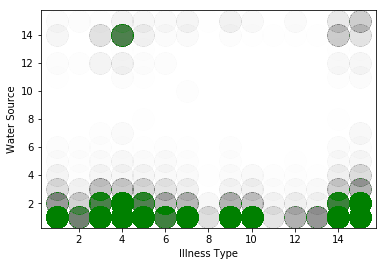

In [169]:
# Scatter plot sample
import numpy as np
import matplotlib.pyplot as plt


x = dfstacked["nSickness"] 
y = dfstacked["nSource_water"]
#colors = 1#np.random.rand(1)
# area = np.pi * (15 * np.random.rand(50))**2  # 0 to 15 point radii
plt.xlabel("Illness Type")
plt.ylabel("Water Source")
plt.scatter(x, y, s=500, c='g', alpha=0.005)
plt.show()

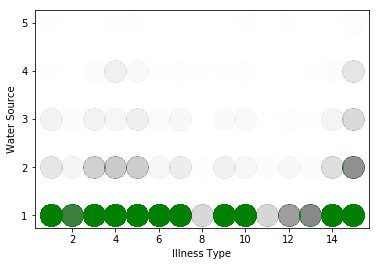

In [168]:
# Scatter plot sample
import numpy as np
import matplotlib.pyplot as plt


x = dfstacked["nSickness"] 
y = dfstacked["nFreq_garb_coll"]
#colors = 1#np.random.rand(1)
# area = np.pi * (15 * np.random.rand(50))**2  # 0 to 15 point radii
plt.xlabel("Illness Type")
plt.ylabel("Water Source")
plt.scatter(x, y, s=500, c='g', alpha=0.005)
plt.show()